<a href="https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extracci√≥n

Se extraen los datos desde la URL proporcionada (en formato JSON) y se almacenan en un DataFrame

In [52]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

Se observa que algunas columnas contienen registros anidados en forma de diccionarios, por lo que es necesario normalizar los datos. Este proceso se abordar√° en la secci√≥n 'üîß Transformaci√≥n'.

#üîß Transformaci√≥n

## Identificando el tipo de datos

In [53]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Se observa que las el tipo de datos de las columnas se representa como objeto. Luego de normalizar correctamente los datos este aspecto deber√° ser abordado.

## Diccionario de datos

A continuaci√≥n se presenta un diccionario de datos del conjunto de datos

- `customerID`: n√∫mero de identificaci√≥n √∫nico de cada cliente
- `Churn`: si el cliente dej√≥ o no la empresa
- `gender`: g√©nero (masculino y femenino)
- `SeniorCitizen`: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripci√≥n al servicio telef√≥nico
- `MultipleLines`: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
- `InternetService`: suscripci√≥n a un proveedor de internet
- `OnlineSecurity`: suscripci√≥n adicional de seguridad en l√≠nea
- `OnlineBackup`: suscripci√≥n adicional de respaldo en l√≠nea
- `DeviceProtection`: suscripci√≥n adicional de protecci√≥n del dispositivo
- `TechSupport`: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
- `StreamingTV`: suscripci√≥n de televisi√≥n por cable
- `StreamingMovies`: suscripci√≥n de streaming de pel√≠culas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en l√≠nea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## Identificando columnas

A priori, podemos identificar algunas columnas clave para nuestro an√°lisis, bas√°ndonos en el an√°lisis exploratorio inicial y el diccionario de datos. Entre las m√°s relevantes se encuentran:

- **Churn**: Indica si un cliente ha abandonado la empresa o no.
- **PaymentMethod**: Podr√≠a ayudarnos a detectar si existe una relaci√≥n entre el m√©todo de pago y la propensi√≥n a la evasi√≥n.
- **Tenure**: Refleja la antig√ºedad de los clientes, lo que podr√≠a ser √∫til para entender su lealtad.
- **Charges.Monthly y Charges.Total**: Permiten evaluar si existe una relaci√≥n entre el monto cobrado a los clientes y la probabilidad de evasi√≥n.

Existen otras columnas de inter√©s que analizaremos con mayor detalle en las siguientes secciones.


## Transformando y limpiando datos

In [54]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account_normalized = pd.json_normalize(df['account'])

df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account_normalized
], axis=1)

df_final.head()



customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

In [55]:
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
    'PaymentMethod', 'Churn'
]

for col in categorical_cols:
    if col in df_final.columns:
        print(f"Valores √∫nicos en '{col}': {df_final[col].unique()}")
        print(f"Conteo de valores en '{col}':\n{df_final[col].value_counts()}\n")
        print(f"Total de valores en '{col}': {df_final[col].value_counts().sum()}\n")

Valores √∫nicos en 'gender': ['Female' 'Male']
Conteo de valores en 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64

Total de valores en 'gender': 7267

Valores √∫nicos en 'Partner': ['Yes' 'No']
Conteo de valores en 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Total de valores en 'Partner': 7267

Valores √∫nicos en 'Dependents': ['Yes' 'No']
Conteo de valores en 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Total de valores en 'Dependents': 7267

Valores √∫nicos en 'PhoneService': ['Yes' 'No']
Conteo de valores en 'PhoneService':
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Total de valores en 'PhoneService': 7267

Valores √∫nicos en 'MultipleLines': ['No' 'Yes' 'No phone service']
Conteo de valores en 'MultipleLines':
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Total de valores en 'MultipleLines': 7267

Valores √∫ni

In [56]:
import numpy as np

df_final.replace(r'^\s*$', np.nan, regex=True, inplace=True)

print("\nVerificando valores nulos (incluyendo strings vac√≠os):")
print(df_final.isnull().sum())  # Conteo de nulos por columna
print((df_final.isnull().sum() / len(df_final)) * 100)  # Porcentaje de nulos


Verificando valores nulos (incluyendo strings vac√≠os):
customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64
customerID          0.000000
Churn               3.082427
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         

Se observa que la columna Churn contiene valores vac√≠os. De un total de 7,267 registros, 224 presentan valores faltantes, lo que representa aproximadamente un 3%. En consecuencia, se proceder√° a eliminar estas filas con valores nulos en Churn del DataFrame. Tambien se observan 11 valores vacios para Charges.Total, a√∫n no esta clara la causa de estos valores, por lo que de momento no se borrar√°n

In [57]:
df_final = df_final.dropna(subset=['Churn'])
print("\nVerificando valores nulos (incluyendo strings vac√≠os):")
print(df_final.isnull().sum())  # Conteo de nulos por columna
print((df_final.isnull().sum() / len(df_final)) * 100)  # Porcentaje de nulos


Verificando valores nulos (incluyendo strings vac√≠os):
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64
customerID          0.000000
Churn               0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMov

In [58]:
total_rows = df_final.shape[0]
print(f"N√∫mero total de filas en df_final: {total_rows}")

unique_customer_ids = df_final['customerID'].nunique()
print(f"N√∫mero de customerID √∫nicos: {unique_customer_ids}")

if total_rows > unique_customer_ids:
    print("\n¬°ADVERTENCIA: Hay customerID duplicados en el DataFrame!")
else:
    print("\nTodos los customerID son √∫nicos. ¬°No hay duplicados en esta columna!")

N√∫mero total de filas en df_final: 7043
N√∫mero de customerID √∫nicos: 7043

Todos los customerID son √∫nicos. ¬°No hay duplicados en esta columna!


In [59]:
df_final

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... OnlineBackup  \
0             Yes                No             DSL  ...          Yes   
1             Yes               Yes             DSL  ...           No   
2             Yes                No     Fiber optic  ...           No   
3             Yes                No     Fiber optic  ...          Yes   
4             Yes                No     Fiber optic  ...           No   
...           ...               ...             ...  ...          ...   
7262          Yes                No             DSL  ...           No   
7263          Yes               Yes     Fiber optic  ...           No   
7264          Yes                No             DSL  ...          Yes   
7265          Yes                No             DSL  ...           No   
7266           No  No phone service             DSL  ...          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes         Yes              No        One year   
1                  No          No          No             Yes  Month-to-month   
2                 Yes          No          No              No  Month-to-month   
3                 Yes          No         Yes             Yes  Month-to-month   
4                  No         Yes         Yes              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7262               No         Yes          No              No        One year   
7263               No          No          No             Yes  Month-to-month   
7264               No          No          No              No  Month-to-month   
7265              Yes         Yes          No             Yes        Two year   
7266              Yes          No         Yes             Yes        Two year   

     PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 Yes      Mailed check           65.60          593.3  
1                  No      Mailed check           59.90          542.4  
2                 Yes  Electronic check           73.90         280.85  
3                 Yes  Electronic check           98.00        1237.85  
4                 Yes      Mailed check           83.90          267.4  
...               ...               ...             ...            ...  
7262               No      Mailed check           55.15          742.9  
7263              Yes  Electronic check           85.10         1873.7  
7264              Yes      Mailed check           50.30          92.75  
7265               No      Mailed check           67.85        4627.65  
7266               No  Electronic check           59.00         3707.6  

[7043 rows x 21 columns]

Con los datos limpios, se procede a crear la columna de Cuentas diarias a partir de Charges.Monthly. Para ello, se divide el valor mensual entre 30, obteniendo as√≠ una estimaci√≥n del cargo diario. Con el fin de mantener la consistencia en el conjunto de datos, la nueva columna se nombra en ingl√©s como Charges.daily.

In [60]:
df_final.loc[:, 'Charges.daily'] = df_final['Charges.Monthly'] / 30
df_final.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly Charges.Total  Charges.daily  
0      Mailed check            65.6         593.3       2.186667  
1      Mailed check            59.9         542.4       1.996667  
2  Electronic check            73.9        280.85       2.463333  
3  Electronic check            98.0       1237.85       3.266667  
4      Mailed check            83.9         267.4       2.796667  

[5 rows x 22 columns]

##Estandarizaci√≥n y transformaci√≥n de datos

Se procede a revisar el tipo de datos de cada columna y a definirlos correctamente

In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [62]:
# Convertir customerID a string
df_final['customerID'] = df_final['customerID'].astype(str)

# Columnas categ√≥ricas
categorical_columns = [
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df_final[categorical_columns] = df_final[categorical_columns].astype('category')

# Limpiar y convertir Charges.Total a float
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   object  
 2   gender            7043 non-null   category
 3   SeniorCitizen     7043 non-null   int64   
 4   Partner           7043 non-null   object  
 5   Dependents        7043 non-null   object  
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   object  
 8   MultipleLines     7043 non-null   category
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   category
 11  OnlineBackup      7043 non-null   category
 12  DeviceProtection  7043 non-null   category
 13  TechSupport       7043 non-null   category
 14  StreamingTV       7043 non-null   category
 15  StreamingMovies   7043 non-null   category
 16  Contract          7043 non-nu

Con los tipos de datos ya definidos, ahora se estandarizar√°n las columnas con opciones Yes o No a binarias.

In [64]:
binary_map = {'Yes': 1, 'No': 0}

binary_columns = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling'
]

df_final[binary_columns] = df_final[binary_columns].apply(lambda col: col.map(binary_map).fillna(col))
df_final.head()

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0  Female              0        1           1       9   
1  0003-MKNFE      0    Male              0        0           0       9   
2  0004-TLHLJ      1    Male              0        0           0       4   
3  0011-IGKFF      1    Male              1        1           0      13   
4  0013-EXCHZ      1  Female              1        1           0       3   

   PhoneService MultipleLines InternetService  ... DeviceProtection  \
0             1            No             DSL  ...               No   
1             1           Yes             DSL  ...               No   
2             1            No     Fiber optic  ...              Yes   
3             1            No     Fiber optic  ...              Yes   
4             1            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year                1   
1          No          No             Yes  Month-to-month                0   
2          No          No              No  Month-to-month                1   
3          No         Yes             Yes  Month-to-month                1   
4         Yes         Yes              No  Month-to-month                1   

      PaymentMethod  Charges.Monthly Charges.Total  Charges.daily  
0      Mailed check             65.6        593.30       2.186667  
1      Mailed check             59.9        542.40       1.996667  
2  Electronic check             73.9        280.85       2.463333  
3  Electronic check             98.0       1237.85       3.266667  
4      Mailed check             83.9        267.40       2.796667  

[5 rows x 22 columns]

#üìä Carga y an√°lisis

##An√°lisis Descriptivo

In [65]:
df_final.describe()

Churn  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.265370       0.162147     0.483033     0.299588    32.371149   
std       0.441561       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  Charges.Monthly  Charges.Total  \
count   7043.000000       7043.000000      7043.000000    7032.000000   
mean       0.903166          0.592219        64.761692    2283.300441   
std        0.295752          0.491457        30.090047    2266.771362   
min        0.000000          0.000000        18.250000      18.800000   
25%        1.000000          0.000000        35.500000     401.450000   
50%        1.000000          1.000000        70.350000    1397.475000   
75%        1.000000          1.000000        89.850000    3794.737500   
max        1.000000          1.000000       118.750000    8684.800000   

       Charges.daily  
count    7043.000000  
mean        2.158723  
std         1.003002  
min         0.608333  
25%         1.183333  
50%         2.345000  
75%         2.995000  
max         3.958333

###An√°lisis de las variables:

Para todos las varialbes se observa un valor de conteo de 7043, lo que representear√≠a la cantidad de filas en nuestro dataframe. Analisando en detalle cada una se observa:

####Churn
Con una media de 0.265, esta variable binaria (0 para no churn, 1 para churn) sugiere que aproximadamente el 26.5% de los clientes ha abandonado la empresa.

###SeniorCitizen
La media de 0.162 revela que alrededor del 16.2% de los clientes son personas mayores (65 a√±os o m√°s).

###Partner y Dependents
La media de Partner es 0.483 y la de Dependents es 0.299. Esto significa que casi la mitad de los clientes tienen pareja, mientras que un tercio tiene dependientes. Estas variables son relevantes para entender la estructura familiar de los clientes y c√≥mo esto podr√≠a influir en su permanencia.

###tenure
Con una media de 32.37 meses y una desviaci√≥n est√°ndar de 24.56, se observa una amplia dispersi√≥n en la antig√ºedad de los clientes. El 25% de los clientes tiene 9 meses o menos, mientras que el 75% supera los 55 meses, lo que sugiere una mezcla de clientes nuevos y leales.

###PhoneService y PaperlessBilling
La media de PhoneService es 0.903, indicando que la gran mayor√≠a (90.3%) de los clientes tiene servicio telef√≥nico. Por otro lado, la media de PaperlessBilling es 0.592, lo que significa que el 59.2% de los clientes prefiere recibir sus facturas en l√≠nea.

###Charges.Monthly
Con una media de 64.76 y una desviaci√≥n est√°ndar de 30.09, los cargos mensuales muestran una variabilidad considerable. El rango va desde 18.25 hasta 118.75, sugiriendo diferentes niveles de consumo o planes de servicio entre los clientes.

###Charges.Total
La media de 2283.30 y una desviaci√≥n est√°ndar de 2266.77 reflejan la gran dispersi√≥n en el gasto total acumulado por los clientes. Como se mencion√≥ anteniormente, es notorio que hay 11 valores nulos, lo que podr√≠a indicar la necesidad de un tratamiento de datos faltantes.

###Charges.daily
Como es una variable calculada a partir de Charges.Monthly, siguie el mismo patron.


##Gr√°ficos

### Proporciones

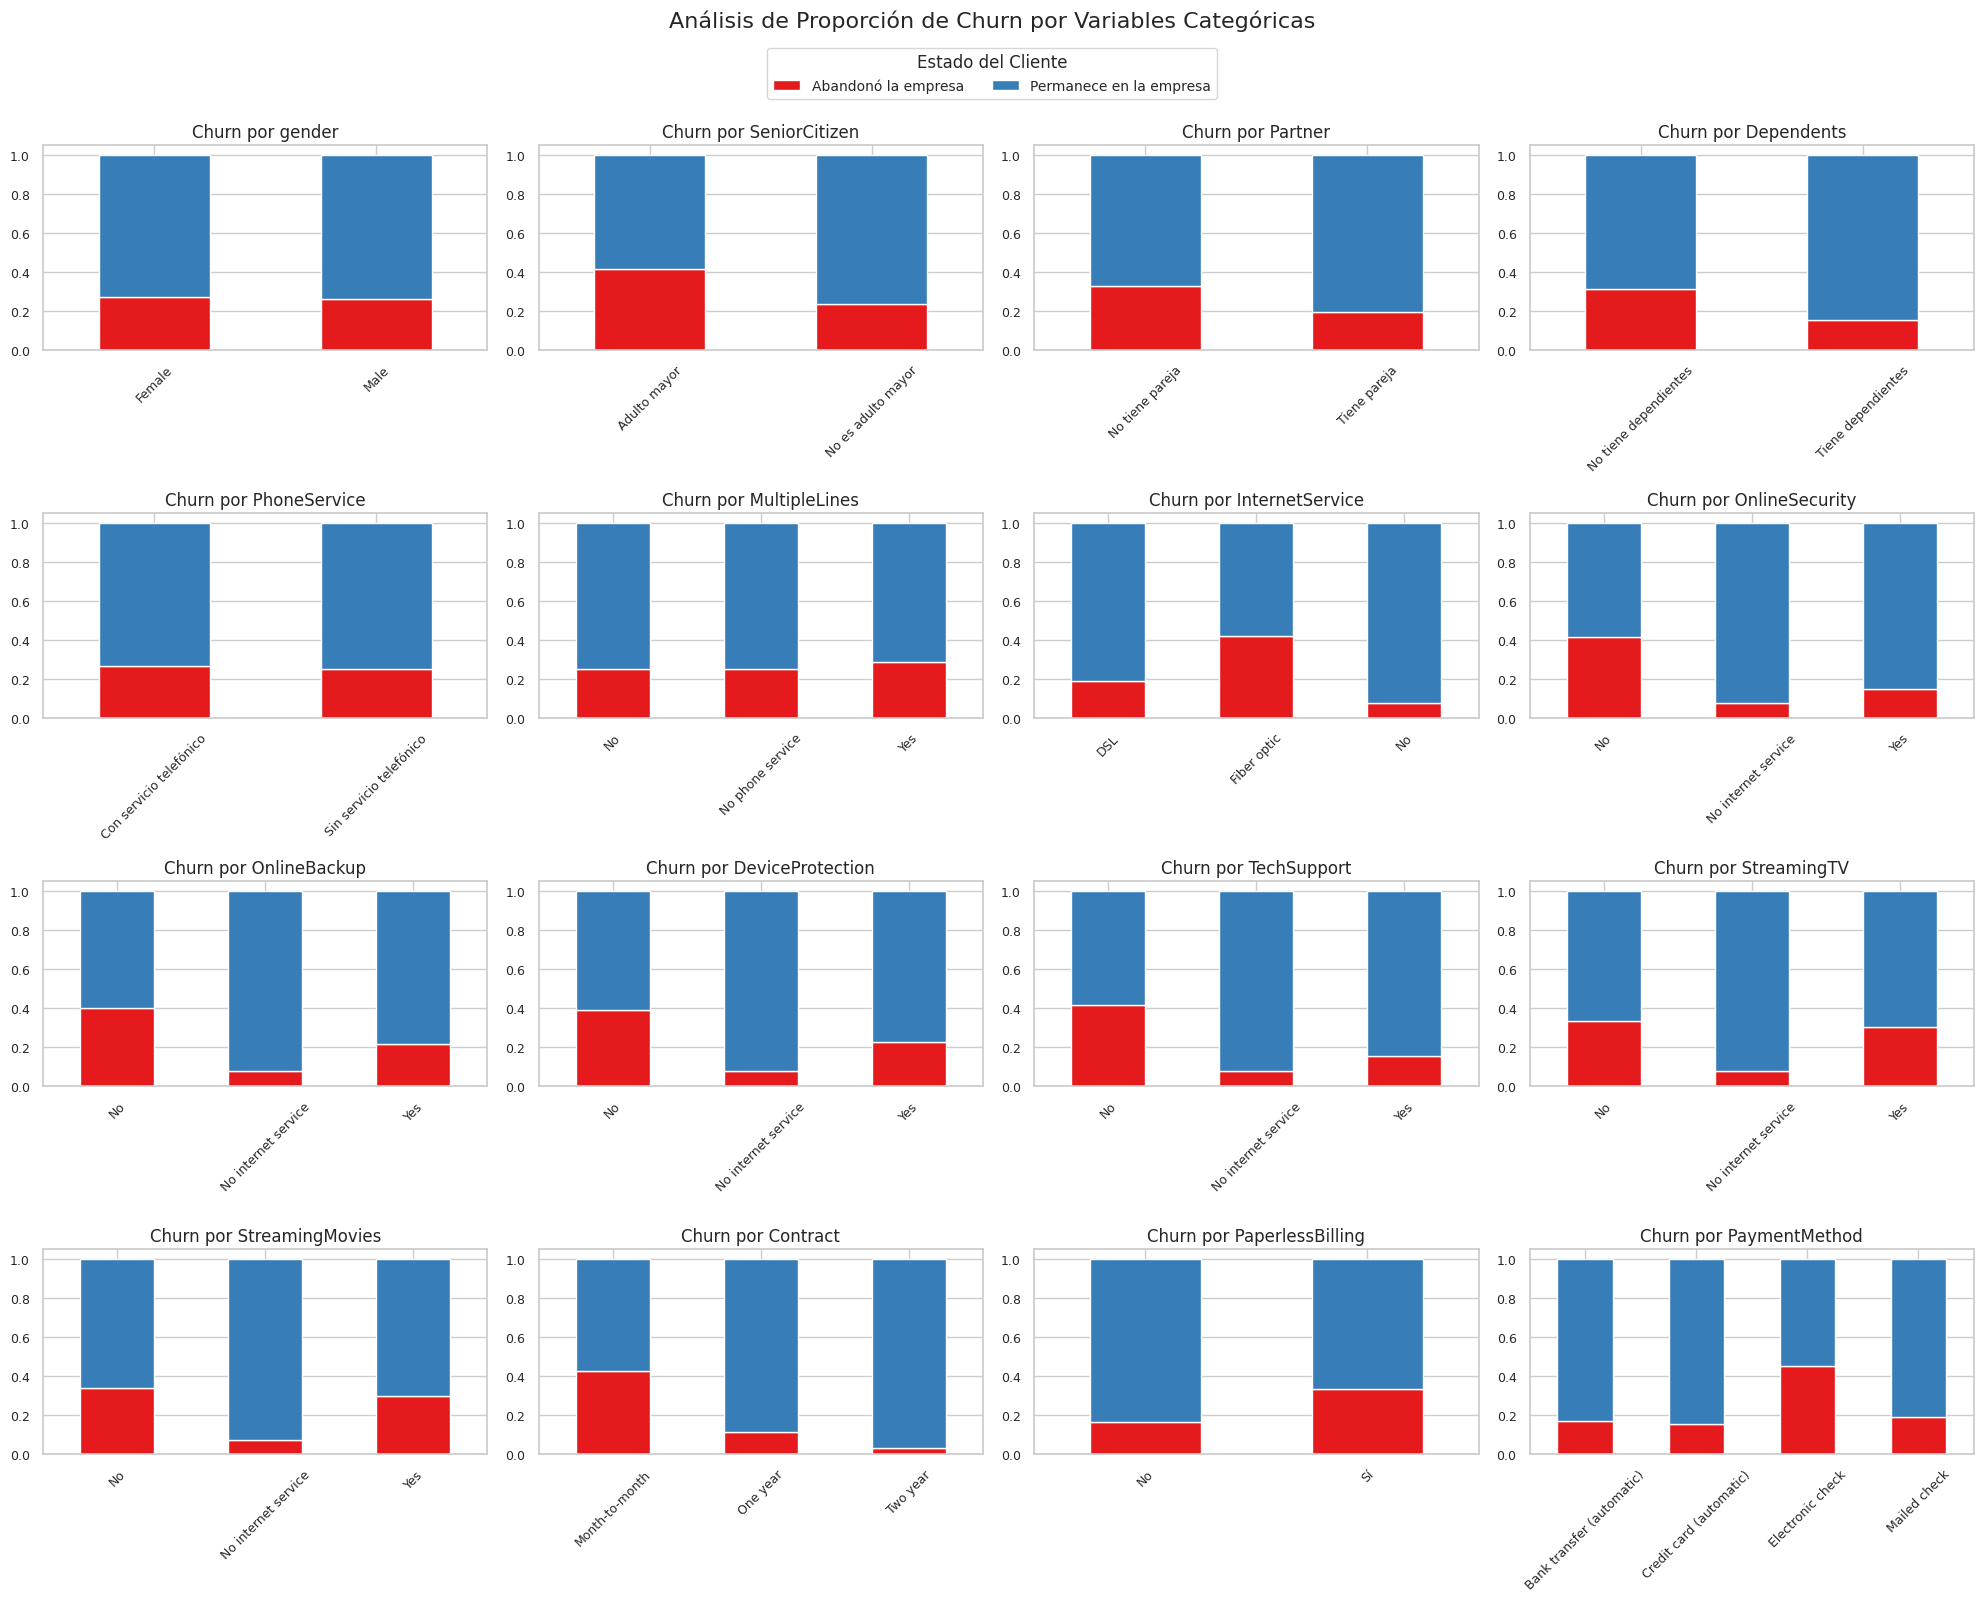

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

df_final['Churn'] = df_final['Churn'].map({0: 'Permanece en la empresa', 1: 'Abandon√≥ la empresa'})

categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

mapeos = {
    'SeniorCitizen': {0: 'No es adulto mayor', 1: 'Adulto mayor'},
    'Partner': {0: 'No tiene pareja', 1: 'Tiene pareja'},
    'Dependents': {0: 'No tiene dependientes', 1: 'Tiene dependientes'},
    'PhoneService': {0: 'Sin servicio telef√≥nico', 1: 'Con servicio telef√≥nico'},

    'PaperlessBilling': {0: 'No', 1: 'S√≠'}
}

df_graficos = df_final

for col, mapping_dict in mapeos.items():
    if col in df_graficos.columns:
        df_graficos[col] = df_graficos[col].map(mapping_dict)

sns.set_theme(style="whitegrid", palette="Set1")

num_plots = len(categorical_vars)
ncols = 4
nrows = (num_plots + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))
axes = axes.flatten()

handles = []
labels = []
legend_added = False

for i, col in enumerate(categorical_vars):
    ax = axes[i]

    churn_proportions = df_graficos.groupby(col, observed=False)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_proportions.plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(f'Churn por {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

    if not legend_added:
        handles, labels = ax.get_legend_handles_labels()
        legend_added = True

    ax.get_legend().remove()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.legend(handles, labels, title='Estado del Cliente',
           loc='upper center',
           bbox_to_anchor=(0.5, 0.98),
           ncol=2,
           fontsize=10,
           title_fontsize=12,
           frameon=True
          )

plt.tight_layout(rect=[0, 0, 1, 0.94])
fig.suptitle('An√°lisis de Proporci√≥n de Churn por Variables Categ√≥ricas', fontsize=16, y=1.0)
plt.show()
fig.savefig('proprociones.png', dpi=300, bbox_inches='tight')



####Resumen General:
Los gr√°ficos revelan que el churn no es un problema uniforme, sino que est√° influenciado de manera heterog√©nea por diversas caracter√≠sticas de los clientes y sus servicios.

Los factores m√°s cr√≠ticos que impulsan que los clientes abandonen la empresa (churn) parecen ser:

* **Tipo de Contrato**: Los contratos mes a mes son el mayor riesgo.
* **Servicio de Internet**: La fibra √≥ptica parece ser un punto d√©bil.
* **Cliente Adulto Mayor**: Este segmento requiere atenci√≥n especial.
* **Falta de Servicios Adicionales**: La ausencia de seguridad, respaldo, protecci√≥n de dispositivos y soporte t√©cnico, as√≠ como servicios de streaming, se correlaciona con mayor churn.
* **M√©todo de Pago**: El cheque electr√≥nico es un indicador de riesgo.
* **Estructura Familiar**: Clientes sin pareja o sin dependientes tienen mayor propensi√≥n a irse.

### Recuento de evasi√≥n por variables categ√≥ricas

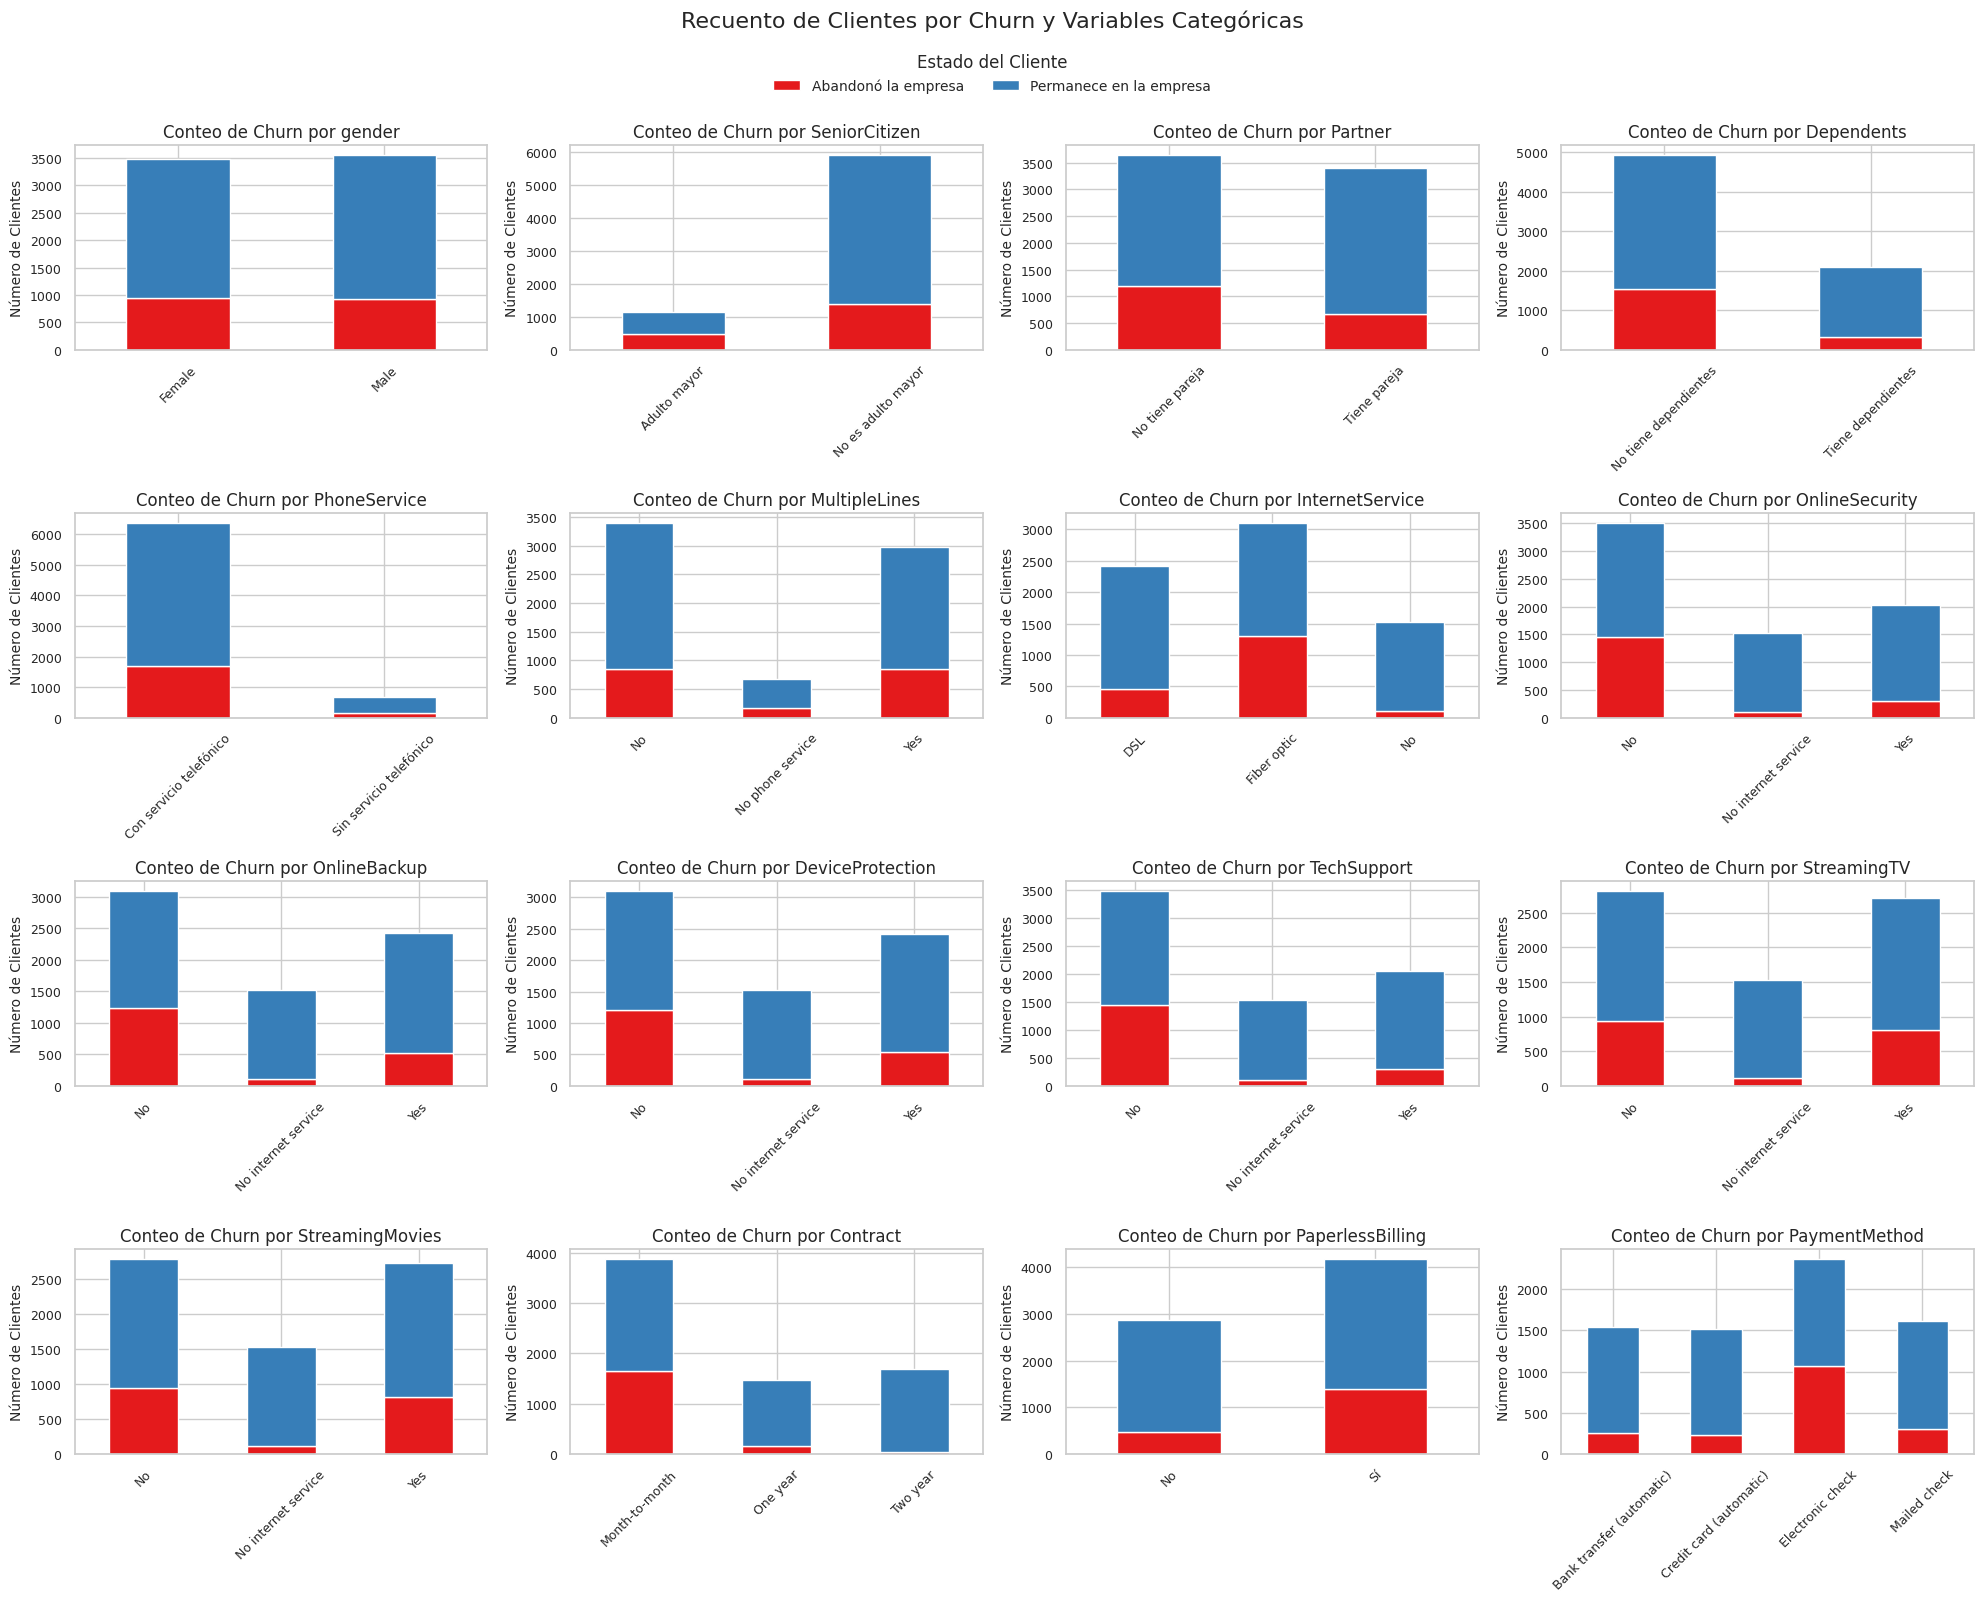

In [67]:
sns.set_theme(style="whitegrid", palette="Set1")

num_plots = len(categorical_vars)
ncols = 4
nrows = (num_plots + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))
axes = axes.flatten()

handles = []
labels = []
legend_captured = False

for i, col in enumerate(categorical_vars):
    ax = axes[i]
    churn_counts = df_graficos.groupby(col, observed=False)['Churn'].value_counts().unstack().fillna(0)

    if 'Abandon√≥ la empresa' not in churn_counts.columns:
        churn_counts['Abandon√≥ la empresa'] = 0
    if 'Permanece en la empresa' not in churn_counts.columns:
        churn_counts['Permanece en la empresa'] = 0

    order_columns = ['Abandon√≥ la empresa', 'Permanece en la empresa']
    final_order = [c for c in order_columns if c in churn_counts.columns]
    churn_counts = churn_counts[final_order]

    churn_counts.plot(kind='bar', stacked=True, ax=ax)

    ax.set_title(f'Conteo de Churn por {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('N√∫mero de Clientes', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

    if not legend_captured:
        handles, labels = ax.get_legend_handles_labels()
        legend_captured = True

    ax.get_legend().remove()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.legend(handles, labels, title='Estado del Cliente',
           loc='upper center',
           bbox_to_anchor=(0.5, 0.98),
           ncol=2,
           fontsize=10,
           title_fontsize=12,
           frameon=False
          )

plt.tight_layout(rect=[0, 0, 1, 0.94])
fig.suptitle('Recuento de Clientes por Churn y Variables Categ√≥ricas', fontsize=16, y=1.0)
plt.show()
fig.savefig('categoricas.png', dpi=300, bbox_inches='tight')

#### Res√∫men general
Los gr√°ficos de conteo reafirman y amplifican las conclusiones de los gr√°ficos de proporciones, destacando d√≥nde se concentra la mayor cantidad de clientes que abandonan. ELa evasi√≥n es un problema heterog√©neo con focos claros de alto volumen.

Los factores m√°s cr√≠ticos que impulsan que los clientes abandonen la empresa (churn) en grandes n√∫meros absolutos parecen ser:

* **Tipo de Contrato**: Los contratos mes a mes son, sin duda, el mayor riesgo y la principal fuente de churn en t√©rminos de volumen.
* **Servicio de Internet**: La Fibra √ìptica es un punto d√©bil no solo en proporci√≥n sino en la cantidad de clientes afectados.
* **Falta de Servicios Adicionales (Seguridad, Respaldo, Protecci√≥n, Soporte, Streaming)**: Estos son segmentos con gran volumen de clientes, y su ausencia conduce a un alto n√∫mero de abandonos.
* **M√©todo de Pago**: El Cheque Electr√≥nico es un indicador de riesgo de churn para un gran grupo de clientes.
* **Estructura Familiar**: Clientes sin pareja o sin dependientes son grupos numerosos con un alto conteo de churn.

###Conteo de evasi√≥n por variables num√©ricas

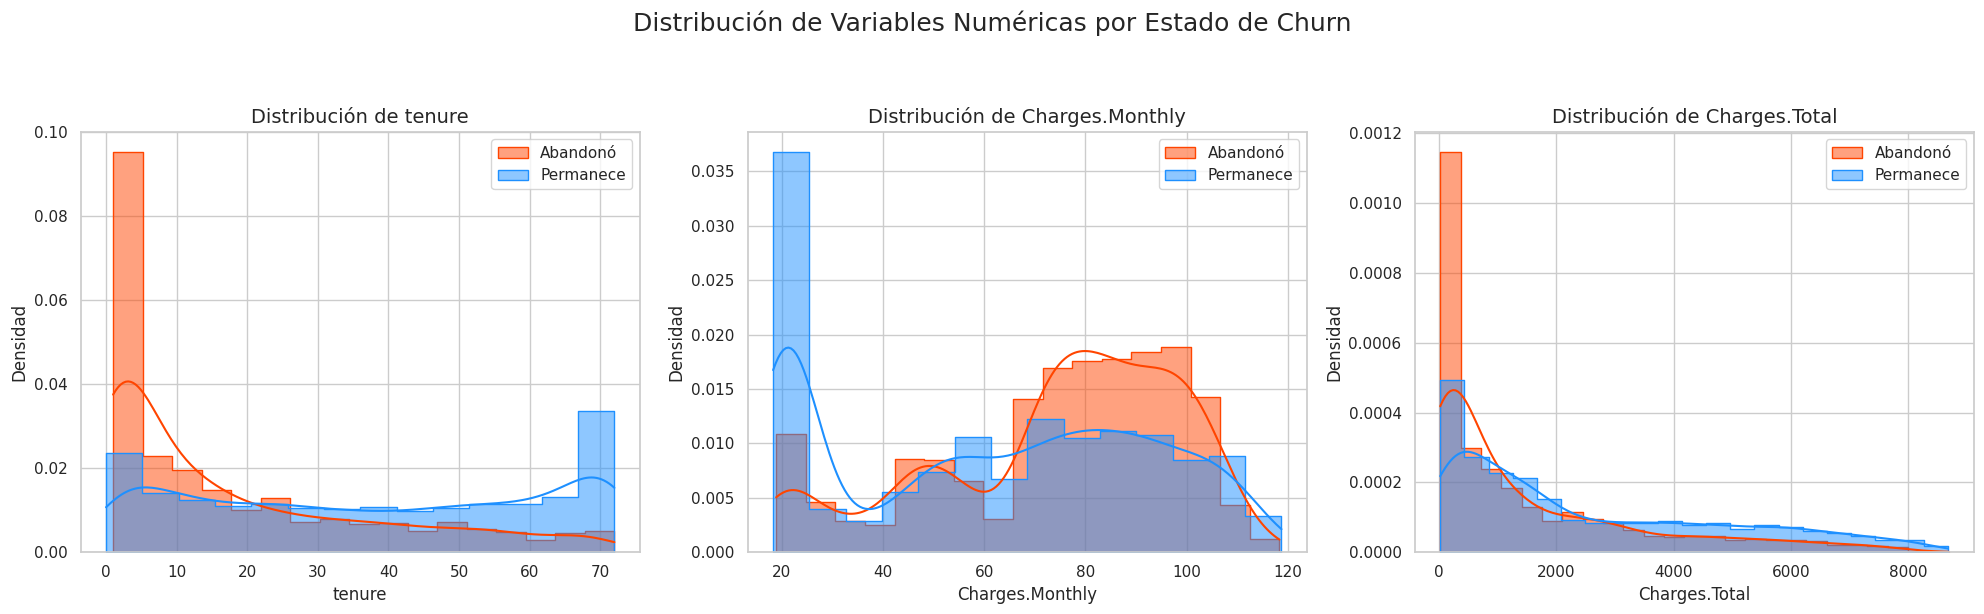

In [68]:
numerical_vars = ['tenure', 'Charges.Monthly', 'Charges.Total']

df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(df_final['Charges.Total'].median())

sns.set_theme(style="whitegrid", palette="viridis")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))


fig.suptitle('Distribuci√≥n de Variables Num√©ricas por Estado de Churn', fontsize=18, y=1.02)

for i, col in enumerate(numerical_vars):
    ax = axes[i]

    sns.histplot(data=df_final[df_final['Churn'] == 'Abandon√≥ la empresa'], x=col, kde=True,
                 label='Abandon√≥', color='orangered', ax=ax, element="step", stat="density", common_norm=False)

    sns.histplot(data=df_final[df_final['Churn'] == 'Permanece en la empresa'], x=col, kde=True,
                 label='Permanece', color='dodgerblue', ax=ax, element="step", stat="density", common_norm=False)

    ax.set_title(f'Distribuci√≥n de {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Densidad', fontsize=12)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
fig.savefig('distribucion.png', dpi=300, bbox_inches='tight')

####Resumen General:
El an√°lisis de las variables num√©ricas refuerza de manera contundente los hallazgos del an√°lisis de proporciones. Se dibuja un perfil muy claro del cliente propenso a la evasi√≥n: son clientes relativamente nuevos, que pagan una tarifa mensual elevada, y que, en consecuencia, abandonan la empresa antes de haber acumulado un gasto total significativo. Esto sugiere que la experiencia inicial del cliente y la percepci√≥n del valor por el costo son absolutamente cruciales para la retenci√≥n.

Los factores num√©ricos m√°s cr√≠ticos que impulsan el churn son:

* **Antig√ºedad del Cliente (Tenure):** El Per√≠odo Cr√≠tico.
El gr√°fico de tenure es el m√°s revelador. La distribuci√≥n de los clientes que abandonaron est√° masivamente concentrada en los primeros meses de servicio (un pico enorme cerca de tenure = 0). En contraste, los clientes que permanecen muestran una distribuci√≥n mucho m√°s uniforme y con un pico significativo en la antig√ºedad m√°s alta (m√°s de 70 meses).

* **Cargos Mensuales (Charges.Monthly):** La Sensibilidad al Precio.
Los clientes que abandonaron tienden a tener cargos mensuales m√°s altos. Su distribuci√≥n tiene un pico claro entre los 70 y 100. Por otro lado, la mayor concentraci√≥n de clientes que permanecen se encuentra en el extremo inferior de los cargos mensuales (alrededor de 20).

* **Cargos Totales (Charges.Total):** La Evidencia del Abandono Temprano.
A primera vista, podr√≠a parecer contradictorio que los clientes que abandonaron tengan cargos totales significativamente m√°s bajos. Sin embargo, esto confirma y refuerza las dos conclusiones anteriores. La distribuci√≥n de cargos totales para la evaci√≥n est√° fuertemente sesgada hacia valores muy bajos. Los clientes no se van porque hayan gastado poco; al contrario, su gasto total es bajo porque se van muy pronto.

#üìÑInforme final

## Introducci√≥n
El presente informe detalla el an√°lisis realizado sobre el conjunto de datos de la empresa de telecomunicaciones TelecomX, con el objetivo principal de entender los factores que impulsan la evasi√≥n de clientes, fen√≥meno conocido como Churn. La p√©rdida de clientes es un problema cr√≠tico para cualquier empresa de servicios por suscripci√≥n, ya que impacta directamente en los ingresos y la sostenibilidad del negocio.

El objetivo de este an√°lisis es identificar los perfiles de clientes m√°s propensos a abandonar la empresa y los atributos de servicio asociados a esta decisi√≥n. A trav√©s de la limpieza de datos, el an√°lisis exploratorio y la visualizaci√≥n, se buscar√° generar insights que permitan a TelecomX desarrollar estrategias de retenci√≥n m√°s efectivas y proactivas.

##  Limpieza y Tratamiento de Datos

El proceso para preparar los datos para el an√°lisis fue riguroso y sigui√≥ varios pasos clave para asegurar la calidad y consistencia del dataset:

* **Extracci√≥n de Datos**: Los datos se extrajeron inicialmente desde una URL en formato JSON y se cargaron en un DataFrame de pandas. El procedimiento se puede evidenciar en la secci√≥n [üìå Extracci√≥n](https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb#scrollTo=DZhNNm_IftxC).

* **Normalizaci√≥n de Datos Anidados**: Se identific√≥ que varias columnas (customer, phone, internet, account) conten√≠an datos anidados en formato de diccionario. Se utiliz√≥ la funci√≥n pd.json_normalize para expandir estas columnas y se concatenaron en un DataFrame final y limpio (df_final). Esto fue abordado en la secci√≥n [Transformando y limpiando datos](https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb#scrollTo=FvbJlz9UYl8P)

* **[Manejo de Valores Nulos](https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb#scrollTo=Hsy7pk-PFoWk&line=4&uniqifier=1):**
Se detectaron 224 registros (aproximadamente un 3%) con valores nulos en la columna Churn. Debido a que esta es nuestra variable objetivo, se tom√≥ la decisi√≥n de eliminar estas filas para no sesgar el an√°lisis. Se identificaron 11 valores nulos en la columna Charges.Total, los cuales se mantuvieron para ser tratados posteriormente durante la transformaci√≥n de tipos de datos.

* [Creaci√≥n de nueva columna charges](https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb#scrollTo=muAKP87AG9aT&line=2&uniqifier=1): Se cre√≥ la columna Charges.daily dividiendo los cargos mensuales (Charges.Monthly) por 30, para obtener una estimaci√≥n del costo diario para el cliente.

* **[Estandarizaci√≥n de Tipos de Datos](https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb#scrollTo=qPBj5HQ1HmUA)**:
Se ajustaron los tipos de datos de las columnas para optimizar el uso de memoria y facilitar el an√°lisis, convirtiendo columnas de texto a tipo category  y asegurando que las columnas num√©ricas como Charges.Monthly y Charges.Total fueran de tipo float.

  [Las columnas con respuestas binarias](https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb#scrollTo=uqN84AAjIJqO&line=3&uniqifier=1) ('Yes'/'No'), como Partner, Dependents y la propia Churn, se transformaron a un formato num√©rico (1/0) para facilitar los c√°lculos y el modelado.
  Verificaci√≥n de Duplicados: Se confirm√≥ que cada fila correspond√≠a a un cliente √∫nico, verificando que no existieran customerID duplicados en el conjunto de datos final de 7,043 registros.



## An√°lisis Exploratorio de Datos
El an√°lisis estad√≠stico inicial revel√≥ informaci√≥n clave sobre la base de clientes:

* **Tasa de Evasi√≥n**: Aproximadamente el 26.5% de los clientes en el dataset han abandonado la empresa.
* **Perfil Demogr√°fico**: El 16.2% de los clientes son adultos mayores (SeniorCitizen). Cerca de la mitad tiene pareja (48.3%) y un tercio tiene dependientes (29.9%).

* **Antig√ºedad (Tenure)**: Existe una gran variabilidad en la antig√ºedad de los clientes, con una media de 32 meses. El 25% de los clientes tiene 9 meses o menos, lo que indica una porci√≥n significativa de clientes nuevos.

* **Facturaci√≥n**: Los cargos mensuales (Charges.Monthly) tienen una media de $64.76, pero con una alta dispersi√≥n, sugiriendo una amplia gama de planes y consumos.

## An√°lisis Visual y de Proporciones:
Los [gr√°ficos de proporci√≥n de Churn por variables categ√≥ricas](https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb#scrollTo=DDU5Wpl8vw2J&line=39&uniqifier=1) y los [histogramas de distribuci√≥n para variables num√©ricas](https://colab.research.google.com/github/Near-o7/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb#scrollTo=RrFvIubly5LL&line=1&uniqifier=1)  fueron fundamentales para detectar los factores m√°s influyentes.

![6065892b-b3e2-4fab-b377-9d2cc49dd48f.png](

### Factores Contractuales y de Servicio:

* Tipo de Contrato: Los clientes con contrato "Mes a mes" muestran una tasa de churn dr√°sticamente superior a los que tienen contratos anuales.
* **Servicio de Internet**: El servicio de "Fibra √≥ptica" est√° asociado con una mayor tasa de churn en comparaci√≥n con el DSL, a pesar de ser un servicio premium.
* **Servicios Adicionales**: La ausencia de servicios de valor a√±adido como OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport se correlaciona fuertemente con una mayor probabilidad de abandono.

###Factores de Cliente y Pago:

* **M√©todo de Pago**: El pago mediante "Cheque electr√≥nico" (Electronic check) presenta la tasa de churn m√°s alta entre todos los m√©todos.
* **Perfil del Cliente**: Los SeniorCitizen y los clientes sin pareja (Partner = No) o dependientes (Dependents = No) tienden a abandonar la empresa con m√°s frecuencia.

###Factores Num√©ricos:

* **Antig√ºedad** (Tenure): El riesgo de churn es inversamente proporcional a la antig√ºedad. La mayor√≠a de las deserciones ocurren en los primeros meses.
* **Cargos Mensuales**: Clientes con facturas mensuales m√°s altas son m√°s propensos a la evasi√≥n.

## Conclusiones e Insights
La combinaci√≥n de los an√°lisis nos permite construir un perfil detallado del cliente con alto riesgo de evasi√≥n:

El cliente propenso al churn es t√≠picamente un **cliente nuevo** (tenure bajo), que opta por un **contrato flexible "Mes a mes"**. Con frecuencia, contrata el servicio de **Fibra √ìptica**, lo que **eleva su factura mensual**, pero no lo complementa con servicios de soporte o seguridad que aumentan la "adherencia" al ecosistema de la empresa. Demogr√°ficamente, es m√°s probable que sea un **adulto mayor o una persona sin pareja ni dependientes**. Finalmente, utiliza el **cheque electr√≥nico** como m√©todo de pago, lo que podr√≠a indicar una menor vinculaci√≥n financiera con la empresa.

Este perfil sugiere que el churn no es un evento aleatorio, sino el resultado de una combinaci√≥n de un **alto costo percibido, una baja barrera de salida (contrato mensual) y una integraci√≥n superficial con los servicios de valor a√±adido de la compa√±√≠a.**

## Recomendaciones

Basado en los hallazgos obtenidos, se recomienda implementar una serie de acciones estrat√©gicas para reducir la tasa de evasi√≥n. En primer lugar, es fundamental fortalecer la retenci√≥n temprana mediante un programa de onboarding proactivo dirigido a clientes nuevos durante los primeros 3 a 6 meses. Este programa puede incluir llamadas de seguimiento, tutoriales y una oferta especial de fidelizaci√≥n al cumplir el tercer mes, ya que este per√≠odo ha demostrado ser el m√°s cr√≠tico para la permanencia de los usuarios.

Asimismo, se sugiere incentivar la migraci√≥n desde contratos ‚ÄúMes a mes‚Äù hacia planes de 1 o 2 a√±os, ofreciendo descuentos, meses gratis o la inclusi√≥n de servicios adicionales sin costo. Los contratos a largo plazo se identifican como el principal factor de retenci√≥n, por lo que esta estrategia puede tener un impacto significativo en la disminuci√≥n de la evasi√≥n.

En relaci√≥n con el servicio de Fibra √ìptica, se recomienda revisar su estrategia comercial. A pesar de tratarse de un producto premium, su alta asociaci√≥n con el churn sugiere que los clientes no perciben un valor acorde al precio, o que la calidad del servicio no est√° cumpliendo sus expectativas. Es aconsejable evaluar posibles ajustes de precio o bien mejorar la comunicaci√≥n sobre sus beneficios para alinear la percepci√≥n del usuario con la propuesta de valor.

Tambi√©n se propone promover servicios complementarios que fomenten la "adherencia" o stickiness, tales como OnlineSecurity, TechSupport y OnlineBackup. Estos pueden ofrecerse en paquetes con descuentos atractivos o per√≠odos de prueba gratuitos, especialmente enfocados en clientes nuevos o usuarios de Fibra √ìptica. Los datos muestran que quienes contratan estos servicios adicionales presentan una tasa de evasi√≥n significativamente menor.

Por √∫ltimo, es importante optimizar los m√©todos de pago. Se recomienda investigar las causas detr√°s de la alta tasa de churn entre los usuarios que utilizan ‚ÄúCheque electr√≥nico‚Äù, ya que esto podr√≠a reflejar inestabilidad financiera o fricciones en el proceso de pago. En funci√≥n de los resultados, se podr√≠an implementar incentivos para migrar a m√©todos de pago autom√°ticos, como la tarjeta de cr√©dito, que han demostrado ser indicadores de menor riesgo de cancelaci√≥n.